# BANK LOAN CASE STUDY 

## STEP 1: ASK

Problem Statement(s):
* Establishing a means to determine the factors causing most loan default cases.

Steps: 
* Cleaning Data; treating null values (columns for 99% missing values, rows for less than 2% missing values, filling with most common values otherwise).
* Appending Target(Defaulters/Non-defaulters column from current_application data) with previous application data.
* Visualizing Previous application data to gain insights and find trends; helps determine correlating factors.
* Finilazing deciding factors and assessing the risk, oppurtunity and benefit in current applications.
    

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stat
%matplotlib inline

# IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DATAFRAME(S) UPLOAD
app_data=pd.read_csv("C:/Users/jishn/Desktop/Files Temp/application_data.csv") # Current application data
prev_data=pd.read_csv("C:/Users/jishn/Desktop/Files Temp/previous_application.csv") # Prev application data

In [3]:
# USER DEFINED FUNCTIONS AND SETTINGS
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 10000)
# for na value percentage 
def na_percent(df):    
    return(round(df.isna().mean()*100,2))

## STEP 2: EXPLORATION AND CLEANING

* Understanding the data - See what each column means and signify their part in the process.
* Dropping Columns - Excluding the columns which are not or least significant in the analysis.
* Treating NULL values - Dropping rows when the column has less than 5% Null values and columns when 99% of data points are missing.

In [4]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#LISTING ALL COLUMNS
list(prev_data.columns)

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [7]:
#LISTING ALL COLUMNS
list(app_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [8]:
#DROPPING IRRELEVANT COLUMNS FROM PREV_DATA

prev_data.drop(['SK_ID_PREV',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'SELLERPLACE_AREA',
 'WEEKDAY_APPR_PROCESS_START',            
 'NAME_SELLER_INDUSTRY',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'CODE_REJECT_REASON'], axis=1, inplace=True)

prev_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,Repeater,Country-wide,12.0,middle,0.0
1,108129,Cash loans,25188.615,607500.0,679671.0,NaN,NaN,NaN,NaN,XNA,Approved,-164,XNA,Repeater,Contact center,36.0,low_action,1.0
2,122040,Cash loans,15060.735,112500.0,136444.5,NaN,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,Repeater,Credit and cash offices,12.0,high,1.0
3,176158,Cash loans,47041.335,450000.0,470790.0,NaN,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,Repeater,Credit and cash offices,12.0,middle,1.0
4,202054,Cash loans,31924.395,337500.0,404055.0,NaN,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,Repeater,Credit and cash offices,24.0,high,NaN


In [9]:
#DROPPING IRRELEVANT COLUMNS FROM APP_DATA

app_data.drop(['NAME_TYPE_SUITE','DAYS_BIRTH','DAYS_EMPLOYED','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
               'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
               'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
               'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
               'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG',
               'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
               'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
               'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
               'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
               'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
               'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
               'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
               'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE',
               'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2',
               'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
               'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
               'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
               'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'], 
              axis=1, inplace=True)

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,Laborers,1.0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,Core staff,2.0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,Laborers,1.0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,Laborers,2.0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,Core staff,1.0,0,0,Religion


In [10]:
#OTHER SMALLER CHANGES

app_data.loc[app_data['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special', 'NAME_EDUCATION_TYPE'] = 'Secondary'
app_data.loc[app_data['TARGET'] == 0, 'TARGET'] = 'NO'
app_data.loc[app_data['TARGET'] == 1, 'TARGET'] = 'YES'

In [11]:
#DETERMING NA VALUE PERCENTAGE IN PREV_DATA
prev_data_NA = na_percent(prev_data)

In [12]:
#DETERMING NA VALUE PERCENTAGE IN APP_DATA
app_data_NA = na_percent(app_data)

In [13]:
#DROPPING COLUMNS WITH MORE THAN 50% NULL VALUES (PREV_DATA)
prev_highNA = prev_data_NA[prev_data_NA>=50].index
prev_data.drop(labels = prev_highNA, axis=1, inplace=True)

In [14]:
#DROPPING COLUMNS WITH MORE THAN 50% NULL VALUES (APP_DATA)
app_highNA = app_data_NA[app_data_NA>=50].index
app_data.drop(labels = app_highNA, axis=1, inplace=True)

In [15]:
#MERGING TARGET(DEFAULT STATUS) FROM APP_DATA WITH PREV_DATA
prev_data=prev_data.merge(app_data[['SK_ID_CURR','TARGET', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']], on='SK_ID_CURR', how='left')

In [16]:
#NULL VALUES
na_percent(prev_data)

SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                  22.29
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
NAME_CLIENT_TYPE              0.00
CHANNEL_TYPE                  0.00
CNT_PAYMENT                  22.29
NAME_YIELD_GROUP              0.00
NFLAG_INSURED_ON_APPROVAL    40.30
TARGET                       15.36
OCCUPATION_TYPE              42.75
ORGANIZATION_TYPE            15.36
NAME_EDUCATION_TYPE          15.36
NAME_INCOME_TYPE             15.36
CODE_GENDER                  15.36
NAME_FAMILY_STATUS           15.36
NAME_HOUSING_TYPE            15.36
dtype: float64

In [17]:
#USING ONLY APPROVED CREDIT DATA
prev_data_approved = prev_data[prev_data['NAME_CONTRACT_STATUS']=='Approved']
prev_data_approved.head(50)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,TARGET,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,Repeater,Country-wide,12.0,middle,0.0,NO,NaN,Military,Incomplete higher,State servant,F,Married,House / apartment
1,108129,Cash loans,25188.615,607500.0,679671.0,XNA,Approved,-164,XNA,Repeater,Contact center,36.0,low_action,1.0,NO,Private service staff,Self-employed,Secondary,Commercial associate,F,Civil marriage,House / apartment
2,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,-301,Cash through the bank,Repeater,Credit and cash offices,12.0,high,1.0,NO,Core staff,Postal,Secondary,Working,F,Married,House / apartment
3,176158,Cash loans,47041.335,450000.0,470790.0,XNA,Approved,-512,Cash through the bank,Repeater,Credit and cash offices,12.0,middle,1.0,NO,NaN,XNA,Secondary,Pensioner,M,Married,House / apartment
5,199383,Cash loans,23703.930,315000.0,340573.5,Everyday expenses,Approved,-684,Cash through the bank,Repeater,Credit and cash offices,18.0,low_normal,1.0,NO,Drivers,Business Entity Type 3,Secondary,Working,M,Civil marriage,House / apartment
10,447712,Cash loans,11368.620,270000.0,335754.0,XNA,Approved,-735,Cash through the bank,Repeater,Credit and cash offices,54.0,low_normal,1.0,NO,NaN,XNA,Secondary,Pensioner,F,Widow,House / apartment
11,161140,Cash loans,13832.775,211500.0,246397.5,XNA,Approved,-815,Cash through the bank,Repeater,Credit and cash offices,30.0,middle,1.0,NO,NaN,XNA,Secondary,Pensioner,F,Separated,House / apartment
12,258628,Cash loans,12165.210,148500.0,174361.5,XNA,Approved,-860,Cash through the bank,Repeater,Credit and cash offices,24.0,high,1.0,NO,Laborers,Self-employed,Secondary,Commercial associate,F,Married,House / apartment
13,321676,Consumer loans,7654.860,53779.5,57564.0,XAP,Approved,-408,Cash through the bank,New,Country-wide,8.0,low_action,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,270658,Consumer loans,9644.220,26550.0,27252.0,XAP,Approved,-726,Cash through the bank,New,Stone,3.0,middle,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#NA_COUNT 
na_percent(prev_data_approved)

SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                   0.00
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
NAME_CLIENT_TYPE              0.00
CHANNEL_TYPE                  0.00
CNT_PAYMENT                   0.00
NAME_YIELD_GROUP              0.00
NFLAG_INSURED_ON_APPROVAL     3.82
TARGET                       14.53
OCCUPATION_TYPE              42.07
ORGANIZATION_TYPE            14.53
NAME_EDUCATION_TYPE          14.53
NAME_INCOME_TYPE             14.53
CODE_GENDER                  14.53
NAME_FAMILY_STATUS           14.53
NAME_HOUSING_TYPE            14.53
dtype: float64

In [19]:
#CHECKING ROWS WITH NULL VALUES - 'NFLAG_INSURED_ON_APPROVAL'
prev_data_approved[prev_data_approved['NFLAG_INSURED_ON_APPROVAL'].isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,TARGET,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
18,396305,Cash loans,10181.700,180000.0,180000.0,XNA,Approved,-700,Cash through the bank,Repeater,AP+ (Cash loan),24.0,low_normal,NaN,NO,NaN,XNA,Higher education,Pensioner,F,Separated,House / apartment
47,235737,Cash loans,75897.630,2025000.0,2241513.0,XNA,Approved,-524,Cash through the bank,Repeater,Credit and cash offices,54.0,low_normal,NaN,NO,NaN,Other,Incomplete higher,Commercial associate,F,Married,House / apartment
74,369423,Consumer loans,2652.705,19611.0,14170.5,XAP,Approved,-1525,Cash through the bank,Repeater,Country-wide,6.0,middle,NaN,NO,Security staff,Government,Secondary,Working,M,Married,House / apartment
172,336630,Cash loans,10061.910,112500.0,127350.0,Other,Approved,-631,Cash through the bank,Repeater,AP+ (Cash loan),24.0,high,NaN,YES,NaN,Self-employed,Secondary,Working,M,Married,House / apartment
239,303472,Consumer loans,41383.710,234243.0,234243.0,XAP,Approved,-269,Cash through the bank,New,Stone,6.0,low_normal,NaN,NO,Managers,Business Entity Type 3,Higher education,Working,F,Married,House / apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670146,315728,Cash loans,83758.275,2025000.0,2169342.0,XNA,Approved,-678,XNA,Repeater,Contact center,36.0,low_normal,NaN,NO,High skill tech staff,Electricity,Incomplete higher,Working,F,Separated,House / apartment
1670150,169693,Cash loans,18852.435,90000.0,92970.0,XNA,Approved,-253,XNA,Repeater,Contact center,6.0,high,NaN,NO,Core staff,Self-employed,Secondary,Commercial associate,M,Civil marriage,Rented apartment
1670159,393355,Cash loans,20380.500,450000.0,450000.0,XNA,Approved,-706,XNA,Repeater,Contact center,48.0,middle,NaN,NO,NaN,Other,Secondary,Commercial associate,F,Married,House / apartment
1670175,247954,Cash loans,9740.250,135000.0,135000.0,XNA,Approved,-1010,Cash through the bank,Repeater,Contact center,18.0,middle,NaN,NO,Managers,Government,Secondary,Commercial associate,F,Married,House / apartment


In [20]:
prev_data_approved.fillna({'NFLAG_INSURED_ON_APPROVAL':0}, inplace=True)

In [21]:
#NA_COUNT 
na_percent(prev_data_approved)

SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                   0.00
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
NAME_CLIENT_TYPE              0.00
CHANNEL_TYPE                  0.00
CNT_PAYMENT                   0.00
NAME_YIELD_GROUP              0.00
NFLAG_INSURED_ON_APPROVAL     0.00
TARGET                       14.53
OCCUPATION_TYPE              42.07
ORGANIZATION_TYPE            14.53
NAME_EDUCATION_TYPE          14.53
NAME_INCOME_TYPE             14.53
CODE_GENDER                  14.53
NAME_FAMILY_STATUS           14.53
NAME_HOUSING_TYPE            14.53
dtype: float64

In [22]:
#IGNORING THE 'TARGET' NULL VALUE ROW 
prev_data_approved = prev_data_approved[pd.notnull(prev_data_approved['TARGET'])]

In [23]:
#LISTING NULL VALUE COUNT PER COLUMN
prev_data_approved.isna().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       7
AMT_APPLICATION                   0
AMT_CREDIT                        1
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
NAME_CLIENT_TYPE                  0
CHANNEL_TYPE                      0
CNT_PAYMENT                       3
NAME_YIELD_GROUP                  0
NFLAG_INSURED_ON_APPROVAL         0
TARGET                            0
OCCUPATION_TYPE              285519
ORGANIZATION_TYPE                 0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
CODE_GENDER                       0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
dtype: int64

In [24]:
prev_data_approved.OCCUPATION_TYPE.value_counts()

Laborers                 159468
Sales staff               93060
Core staff                75415
Managers                  58371
Drivers                   52300
High skill tech staff     31306
Accountants               26957
Medicine staff            25574
Security staff            19822
Cooking staff             17925
Cleaning staff            14888
Private service staff      7498
Low-skill Laborers         5686
Waiters/barmen staff       3865
Secretaries                3732
Realty agents              2161
HR staff                   1404
IT staff                   1148
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
#Renaming the NA fields in OCCUPATION_TYPE as Unemployed
prev_data_approved.OCCUPATION_TYPE.fillna('Undeclared', inplace=True)

In [26]:
#LISTING NULL VALUE COUNT PER COLUMN
prev_data_approved.isna().sum()

SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  7
AMT_APPLICATION              0
AMT_CREDIT                   1
NAME_CASH_LOAN_PURPOSE       0
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_PAYMENT_TYPE            0
NAME_CLIENT_TYPE             0
CHANNEL_TYPE                 0
CNT_PAYMENT                  3
NAME_YIELD_GROUP             0
NFLAG_INSURED_ON_APPROVAL    0
TARGET                       0
OCCUPATION_TYPE              0
ORGANIZATION_TYPE            0
NAME_EDUCATION_TYPE          0
NAME_INCOME_TYPE             0
CODE_GENDER                  0
NAME_FAMILY_STATUS           0
NAME_HOUSING_TYPE            0
dtype: int64

In [27]:
#ERADICATING ANY REMAINING ROWS WITH NULL(S) AS THEIR INFLUENCE IS NEGLIGIBLE DURING ANALYSIS
prev_data_approved.dropna(inplace=True)
prev_data_approved.isna().sum()

SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
NAME_CASH_LOAN_PURPOSE       0
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_PAYMENT_TYPE            0
NAME_CLIENT_TYPE             0
CHANNEL_TYPE                 0
CNT_PAYMENT                  0
NAME_YIELD_GROUP             0
NFLAG_INSURED_ON_APPROVAL    0
TARGET                       0
OCCUPATION_TYPE              0
ORGANIZATION_TYPE            0
NAME_EDUCATION_TYPE          0
NAME_INCOME_TYPE             0
CODE_GENDER                  0
NAME_FAMILY_STATUS           0
NAME_HOUSING_TYPE            0
dtype: int64

## STEP 3: VISUALIZATION AND ANALYSIS


In [28]:
prev_data_approved.dtypes

SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int64
NAME_PAYMENT_TYPE             object
NAME_CLIENT_TYPE              object
CHANNEL_TYPE                  object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
NFLAG_INSURED_ON_APPROVAL    float64
TARGET                        object
OCCUPATION_TYPE               object
ORGANIZATION_TYPE             object
NAME_EDUCATION_TYPE           object
NAME_INCOME_TYPE              object
CODE_GENDER                   object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
dtype: object

In [29]:
prev_data_approved.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,TARGET,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,Repeater,Country-wide,12.0,middle,0.0,NO,Undeclared,Military,Incomplete higher,State servant,F,Married,House / apartment
1,108129,Cash loans,25188.615,607500.0,679671.0,XNA,Approved,-164,XNA,Repeater,Contact center,36.0,low_action,1.0,NO,Private service staff,Self-employed,Secondary,Commercial associate,F,Civil marriage,House / apartment
2,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,-301,Cash through the bank,Repeater,Credit and cash offices,12.0,high,1.0,NO,Core staff,Postal,Secondary,Working,F,Married,House / apartment
3,176158,Cash loans,47041.335,450000.0,470790.0,XNA,Approved,-512,Cash through the bank,Repeater,Credit and cash offices,12.0,middle,1.0,NO,Undeclared,XNA,Secondary,Pensioner,M,Married,House / apartment
5,199383,Cash loans,23703.930,315000.0,340573.5,Everyday expenses,Approved,-684,Cash through the bank,Repeater,Credit and cash offices,18.0,low_normal,1.0,NO,Drivers,Business Entity Type 3,Secondary,Working,M,Civil marriage,House / apartment


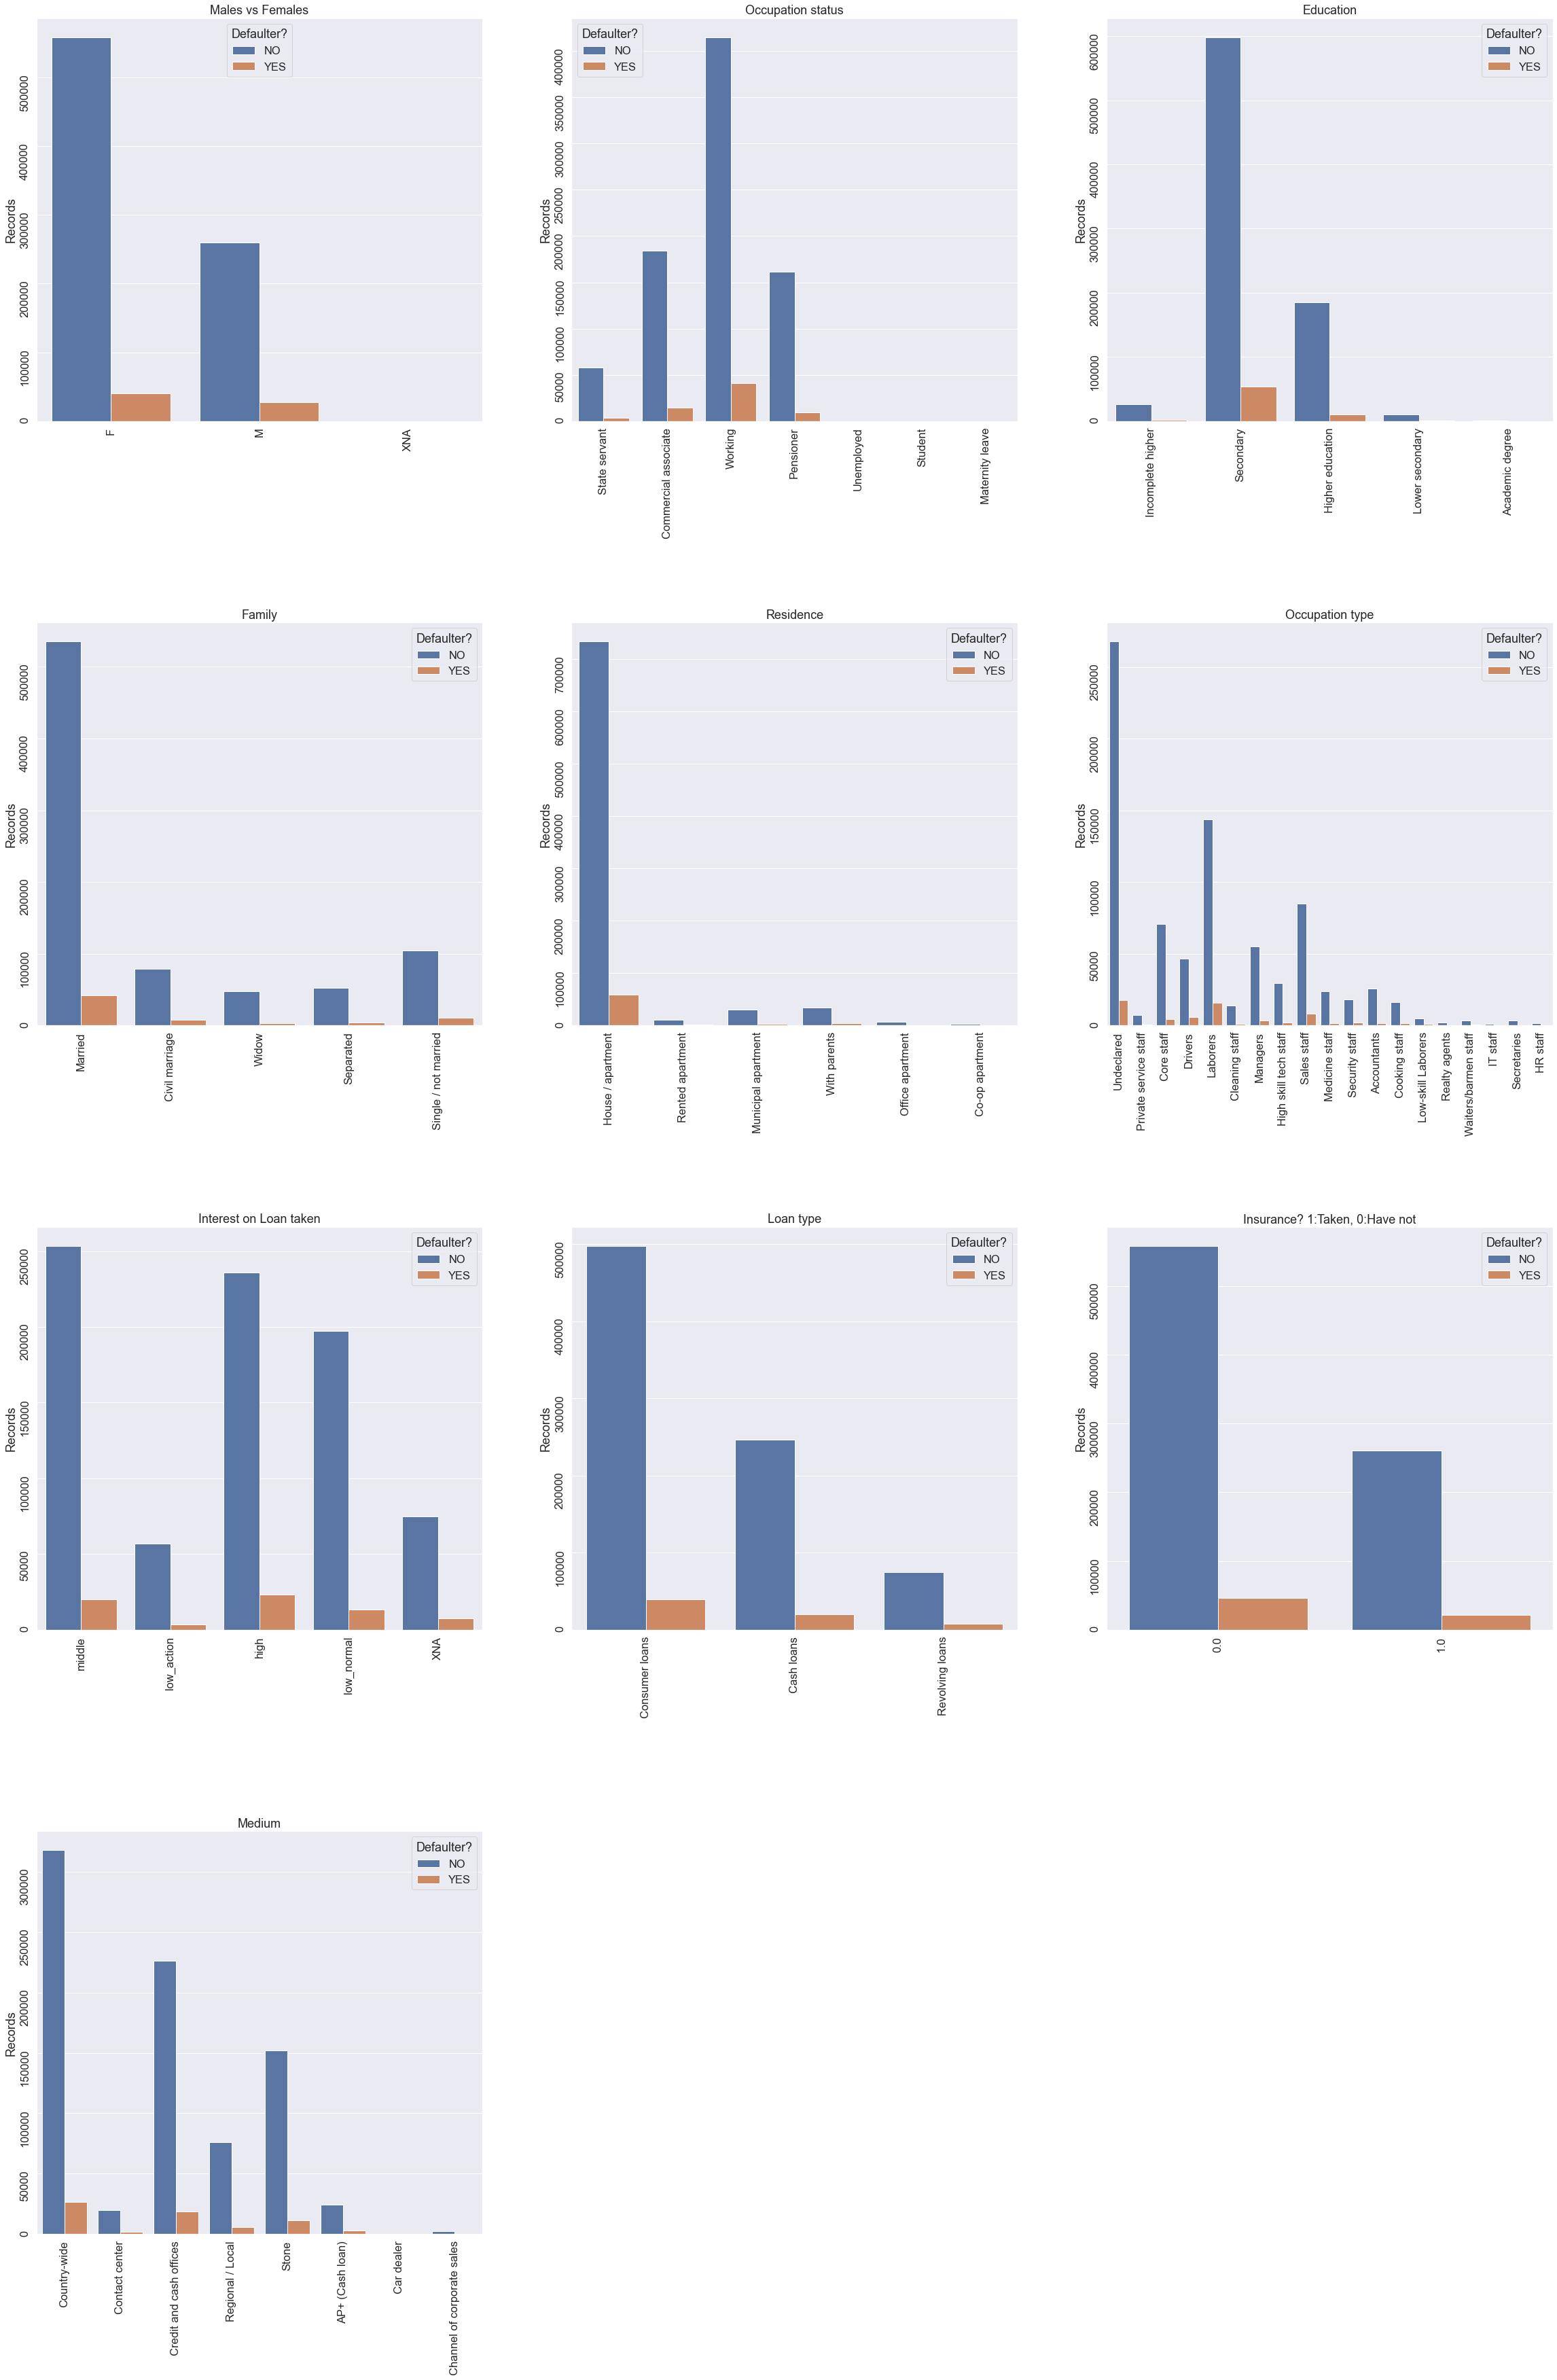

In [30]:
#VISUALIZING WEIGHTAGE OF DESCRIPTIVE CATEGORIES FOR DEFAULTERS AND NON-DEFAULTERS

sns.set(font_scale=1.5)
Loan_Approval_Factors = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'NAME_YIELD_GROUP','NAME_CONTRACT_TYPE', 'NFLAG_INSURED_ON_APPROVAL', 'CHANNEL_TYPE']
Title=['Males vs Females', 'Occupation status', 'Education', 'Family', 'Residence', 'Occupation type', 'Interest on Loan taken', 'Loan type', 'Insurance? 1:Taken, 0:Have not', 'Medium']
plt.figure(figsize = (40, 60))

plt.subplots_adjust(hspace=0.5)
for i,j in zip(enumerate(Loan_Approval_Factors, start=1),enumerate(Title, start=1)):
    plt.subplot(4, 3, i[0])
    sns.countplot(x = i[1], hue = 'TARGET', data = prev_data_approved)
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel('Records')
    plt.legend(title='Defaulter?')
    plt.title(j[1])

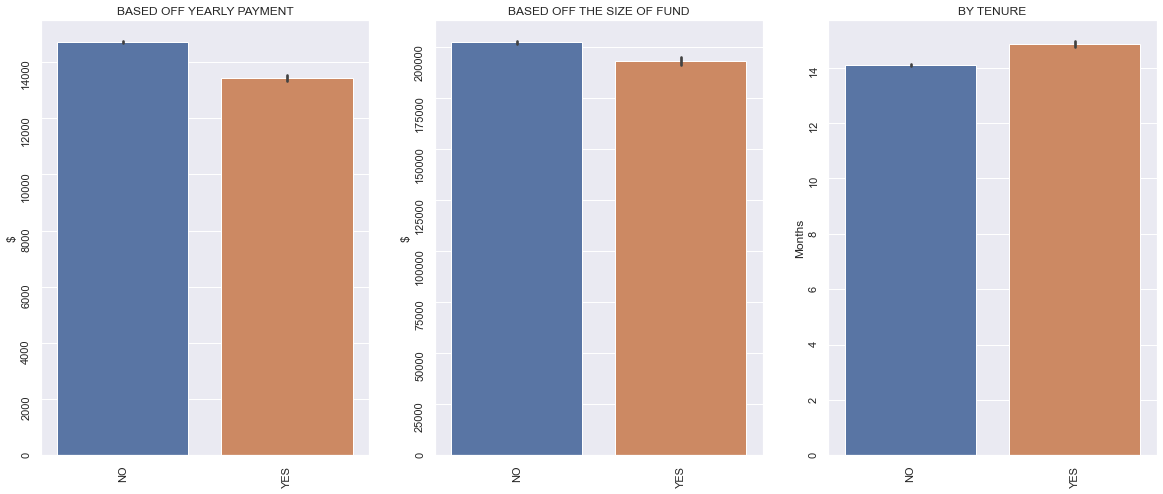

In [31]:
#VISUALIZING WEIGHTAGE OF CONTINUOUS CATEGORIES FOR DEFAULTERS AND NON-DEFAULTERS

sns.set(font_scale=1)
Loan_Approval_Factors = ['AMT_ANNUITY', 'AMT_CREDIT', 'CNT_PAYMENT']
Title=['BASED OFF YEARLY PAYMENT', 'BASED OFF THE SIZE OF FUND', 'BY TENURE']
Ylabel=['$','$','Months']
plt.figure(figsize = (20, 20))

plt.subplots_adjust(hspace=0.5)
for i,j,k in zip(enumerate(Loan_Approval_Factors, start=1),enumerate(Title, start=1),enumerate(Ylabel, start=1)):
    plt.subplot(2, 3, i[0])
    sns.barplot('TARGET', i[1], data = prev_data_approved)
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel(k[1])
    plt.title(j[1])

In [32]:
#Calculating defaulting probability.

Defaulters = prev_data_approved[prev_data_approved.TARGET == 'YES']
Non_defaulters = prev_data_approved[prev_data_approved.TARGET == 'NO']
Loan_Approval_Factors = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'NAME_YIELD_GROUP','NAME_CONTRACT_TYPE', 'NFLAG_INSURED_ON_APPROVAL', 'CHANNEL_TYPE']

for i in enumerate(Loan_Approval_Factors, start=1):
    print(round((((Defaulters[i[1]].value_counts())/((Defaulters[i[1]].value_counts())+(Non_defaulters[i[1]].value_counts()))) * 100), 2)) 
    

F      6.66
M      9.53
XNA     NaN
Name: CODE_GENDER, dtype: float64
Commercial associate     7.16
Maternity leave           NaN
Pensioner                5.24
State servant            5.67
Student                   NaN
Unemployed              45.59
Working                  8.91
Name: NAME_INCOME_TYPE, dtype: float64
Secondary            8.26
Higher education     5.23
Incomplete higher    7.77
Lower secondary      9.54
Academic degree      1.44
Name: NAME_EDUCATION_TYPE, dtype: float64
Married                 7.28
Single / not married    9.04
Civil marriage          9.06
Separated               7.48
Widow                   5.45
Name: NAME_FAMILY_STATUS, dtype: float64
House / apartment       7.33
With parents           11.16
Municipal apartment     8.37
Rented apartment       11.61
Office apartment        6.29
Co-op apartment         7.25
Name: NAME_HOUSING_TYPE, dtype: float64
Accountants               4.92
Cleaning staff            8.18
Cooking staff             9.42
Core staff      

## STEP 4: SHARING INSIGHTS 


### WE COMPARE INSIGHTS FROM THE CATEGORICAL VALUES FOR BOTH DEFAULTERS AND NON-DEFAULTERS:

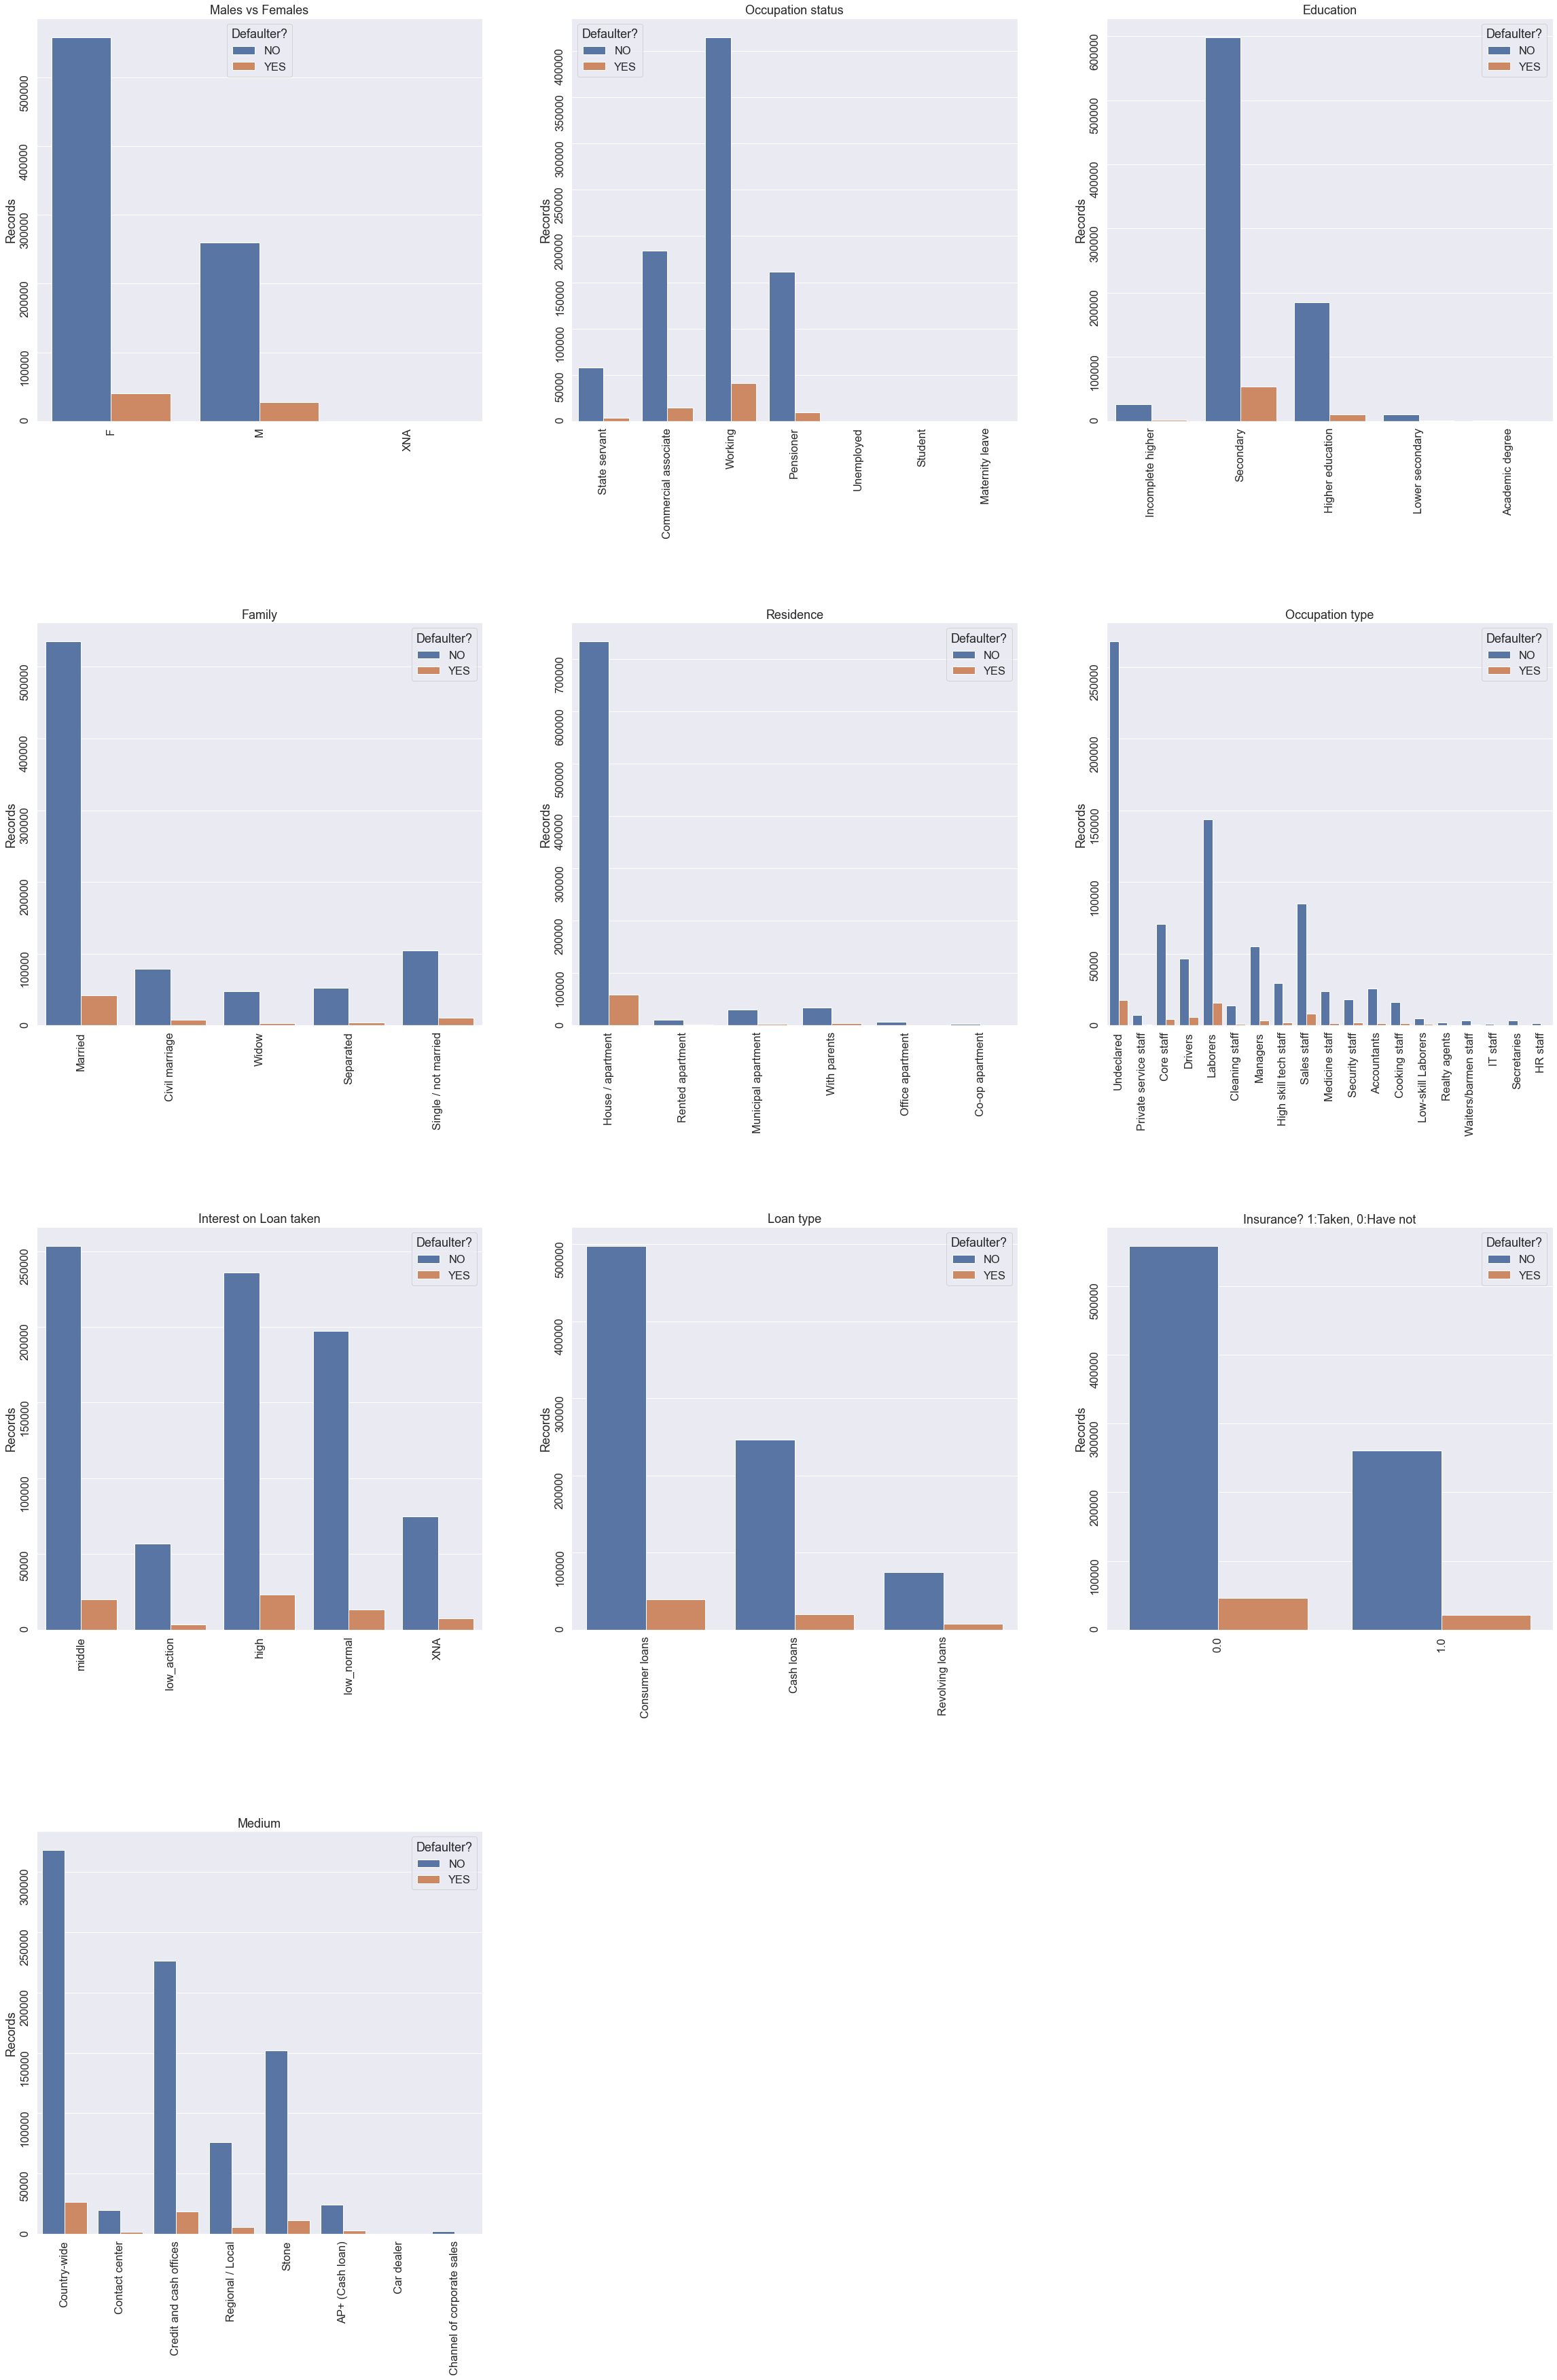

* Males vs Females: 
    * Observations: 
        * Records of more male loan seekers than females. 
        * Risk exists in both cases.
        * Defaulting Probability: 
            * Females 6.66%, 
            * Males 9.53%
    * Conclusion: Eligibility may not be dictated on basis of sex.
    
* Education:
    * Observations: 
        * Majority of loan seekers hold a secondary degree followed by group with higher education.
        * Defaulting Probability:
            * Secondary            8.26%
            * Higher education     5.23%
            * Incomplete higher    7.77%
            * Lower secondary      9.54%
            * Academic degree      1.44%
    * Conclusions: 
        * By probability, Academic degree holders are least and Lower secondary holders are most probable to default.
        
* Family:
    * Observations:
        * Most loan seekers are married. 
        * Defaulting Probability:
            * Married                 7.28%
            * Single / not married    9.04%
            * Civil marriage          9.06%
            * Separated               7.48%
            * Widow                   5.45%
    * Conclusions: Widows have the least probability to default while Single and Civil married individuals have the most probability. 
    
* Residence:
    * Observations:
        * Most loan seekers have their own house/apartment. 
        * Defaulting Probability:
            * House / apartment       7.33%
            * With parents           11.16%
            * Municipal apartment     8.37%
            * Rented apartment       11.61%
            * Office apartment        6.29%
            * Co-op apartment         7.25%
    * Conclusions: 
        * Its safer to lend to individuals with their own property(Apartment/Muncipal/Co-op/Office) than to ones with no property.
        
* Occupation Status:
    * Observations:
        * The working class seem to be the majority of loan seekers followed by commmercial associates.
        * The working class also seems to have less number of defaulting cases comparatively.
        * Defaulting Probability:
            * Commercial associate     7.16%
            * Pensioner                5.24%
            * State servant            5.67%
            * Unemployed              45.59%
            * Working                  8.91%
    * Conclusions: 
        * Pensioners, State Servants, Commercial associates and Working individuals have lowest chances of defaulting.
        * Unemployed individuals pose the highest risk.
        
* Occupation type(Subset of Working individuals):
    * Observations:
        * Laborers are the most loan seekers followed by Sales staff. 
        * Defaulting Probability: 
            * Accountants               4.92%
            * Cleaning staff            8.18%
            * Cooking staff             9.42%
            * Core staff                5.94%
            * Drivers                  10.65%
            * HR staff                  6.05%
            * High skill tech staff     6.04%
            * IT staff                  6.27%
            * Laborers                  9.73%
            * Low-skill Laborers       17.20%
            * Managers                  6.04%
            * Medicine staff            6.33%
            * Private service staff     6.35%
            * Realty agents             8.05%
            * Sales staff               8.95%
            * Secretaries               7.10%
            * Security staff            9.72%
            * Waiters/barmen staff      9.75%
        * Conclusions: Low-skill laborers tend to default the most while the least probable to default are accountants. 
        
        
### ADDITIONAL  INSIGHTS: 

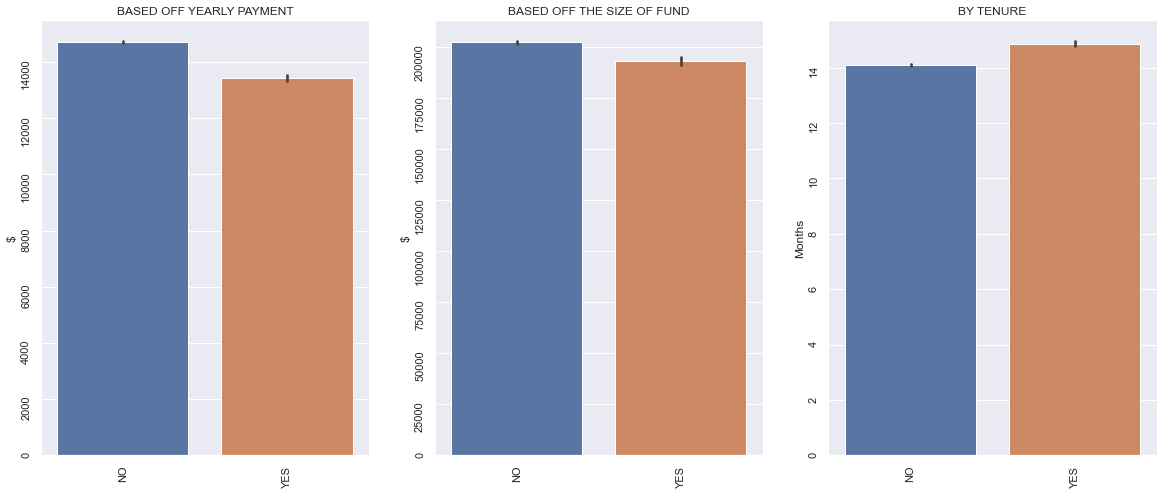

* When compared the records based off yearly payment sum, size of fund borrowed andd tenure, the difference is negligible. Therefore, no perfect conclusion can be made from the above chart. 

## STEP 5: ACT

In [33]:
# Setting up the model to calculate the average probability for each factor.


Loan_Approval_Factors = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'NAME_YIELD_GROUP','NAME_CONTRACT_TYPE', 'NFLAG_INSURED_ON_APPROVAL', 'CHANNEL_TYPE']
Variables = ['Gender', 'Occupation', 'Education', 'MartialStatus', 'Residence', 'OccupationType']

Vals = {i: dict((((Defaulters[j].value_counts())/((Defaulters[j].value_counts())+(Non_defaulters[j].value_counts())) * 100))) for i, j in zip(Variables, Loan_Approval_Factors)}

In [35]:
# Setting up final model to determine the nominal interest eligibility ( CALCULATES COMBINED AVERAGE PROBABILITY )

c=0 
for a in Vals:
    print(a)
    print(list(Vals[a].keys()))
    b = input('Select from above:')
    c = c+Vals[a][b]
    prob=c/6
    if prob <= 8:
        print('Eligible for nominal interest loan')
    else:
        print('Ineligible for nominal interest loan')

Gender
['F', 'M', 'XNA']
Select from above:M
Eligible for nominal interest loan
Occupation
['Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']
Select from above:Working
Eligible for nominal interest loan
Education
['Secondary', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
Select from above:Academic degree
Eligible for nominal interest loan
MartialStatus
['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow']
Select from above:Single / not married
Eligible for nominal interest loan
Residence
['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']
Select from above:House / apartment
Eligible for nominal interest loan
OccupationType
['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff